In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [2]:
data = pd.read_csv("titanic_train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape

(891, 12)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

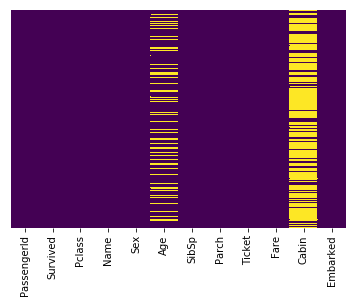

In [6]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap="viridis")

Roughly 20% of the data in the age column are missing

### Comparing rate of death and survival

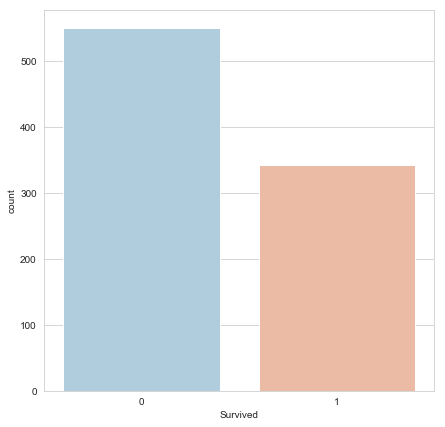

In [7]:
plt.figure(figsize=(7,7))
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=data,palette="RdBu_r")

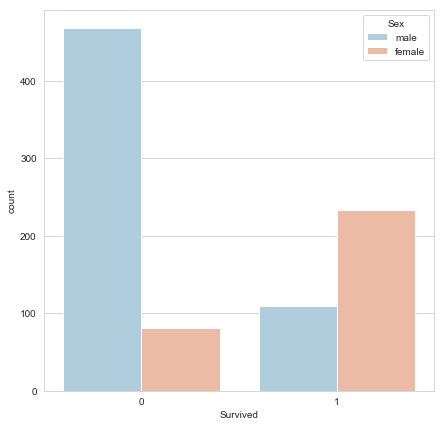

In [8]:
plt.figure(figsize=(7,7))
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Sex",data=data,palette="RdBu_r")

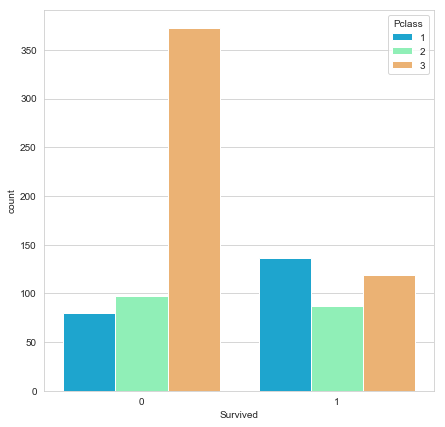

In [9]:
plt.figure(figsize=(7,7))
sns.set_style("whitegrid")
sns.countplot(x="Survived",hue="Pclass",data=data,palette="rainbow")

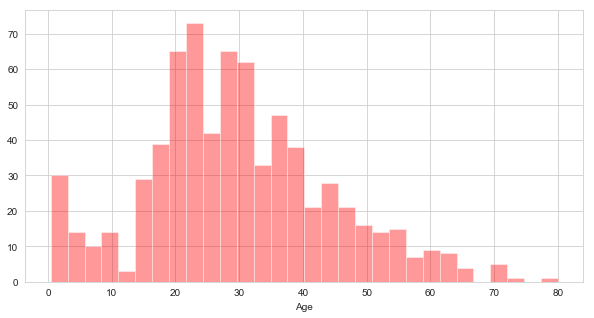

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(data["Age"].dropna(),kde=False,bins=30,color="red")

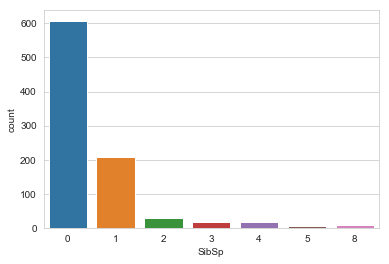

In [11]:
sns.countplot(x="SibSp",data=data)

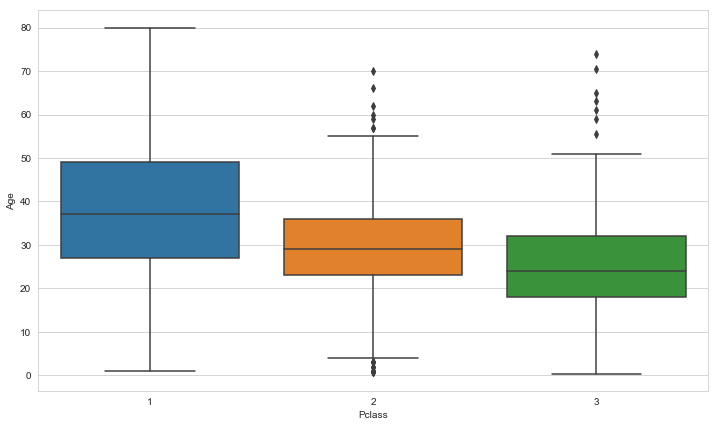

In [12]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=data)

In [13]:
box_age = data[['Pclass', 'Age']]
box_age.pivot(columns='Pclass', values='Age').iplot(kind='box')

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
data["Age"] = data[["Age","Pclass"]].apply(impute_age,axis=1)

In [16]:
data.drop("Cabin",axis=1,inplace=True)

In [17]:
data.dropna(inplace=True)

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Handling Categorical Variable with one hot encoding

In [19]:
sex = pd.get_dummies(data["Sex"],drop_first=True)
embark = pd.get_dummies(data["Embarked"],drop_first=True)

In [20]:
data.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [21]:
train = pd.concat([data,sex,embark],axis=1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Train, Test, Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("Survived",axis=1),train["Survived"], test_size=0.30, random_state=101)

In [28]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\aminu israel\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
predictions = pd.DataFrame(predictions)

In [34]:
predictions.count()

0    267
dtype: int64

In [104]:
X_train.shape

(622, 9)

In [105]:
X_test.shape

(267, 9)

In [106]:
y_train.shape

(622,)

In [107]:
y_test.shape

(267,)

In [108]:
from sklearn.metrics import classification_report

In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

